<a href="https://colab.research.google.com/github/utels2425-beep/HW7_U11310022/blob/main/pygmt_plot_plate_boundary2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PyGMT 0.17 no Google Colab

> ⚠️ **Nota:** Há uma incompatibilidade temporária no sistema de resolução do conda/mamba no Colab (a versão do Python em uso é **3.12.11**, mas o solver pode conter um *pin* interno diferente).  
> Por isso, para instalar o PyGMT é necessário usar uma versão compatível do **condacolab** (ou ajustar o arquivo `pinned` do conda para **python=3.12**).  
> Depois disso, o **PyGMT 0.17** instala e executa normalmente. Isso será corrigido em uma atualização futura do Colab.


In [1]:
!pip install condacolab --quiet
# need to install condacolab for a python 3.11 pin
import condacolab
condacolab.install_from_url("https://github.com/conda-forge/miniforge/releases/download/25.3.1-0/Miniforge3-Linux-x86_64.sh")

✨🍰✨ Everything looks OK!


**Don't PANIC !** The kernel will restart automatically.

After that, install `pygmt` normally.

In [4]:
!mamba install pygmt --quiet # <--- it takes around 1 minute

In [5]:
!mamba install obspy --quiet

In [6]:
import pygmt
pygmt.show_versions()

PyGMT information:
  version: v0.17.0
System information:
  python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
  executable: /usr/bin/python3.real
  machine: Linux-6.6.105+-x86_64-with-glibc2.35
Dependency information:
  numpy: 2.3.5
  pandas: 2.2.2
  xarray: 2025.11.0
  packaging: 25.0
  contextily: None
  geopandas: 1.1.1
  IPython: 7.34.0
  pyarrow: 18.1.0
  rioxarray: None
  gdal: 3.11.0
  ghostscript: 10.06.0
GMT library information:
  version: 6.5.0
  padding: 2
  share dir: /usr/local/share/gmt
  plugin dir: /usr/local/lib/gmt/plugins
  library path: /usr/local/lib/libgmt.so
  cores: 2
  grid layout: rows
  image layout: 
  binary version: 6.5.0


gmtread [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
gmtread [NOTICE]: SRTM15 Earth Relief v2.7 at 1x1 arc degrees reduced by Gaussian Cartesian filtering (314.5 km fullwidth) [Tozer et al., 2019].
gmtread [NOTICE]:   -> Download grid file [111K]: earth_relief_01d_p.grd


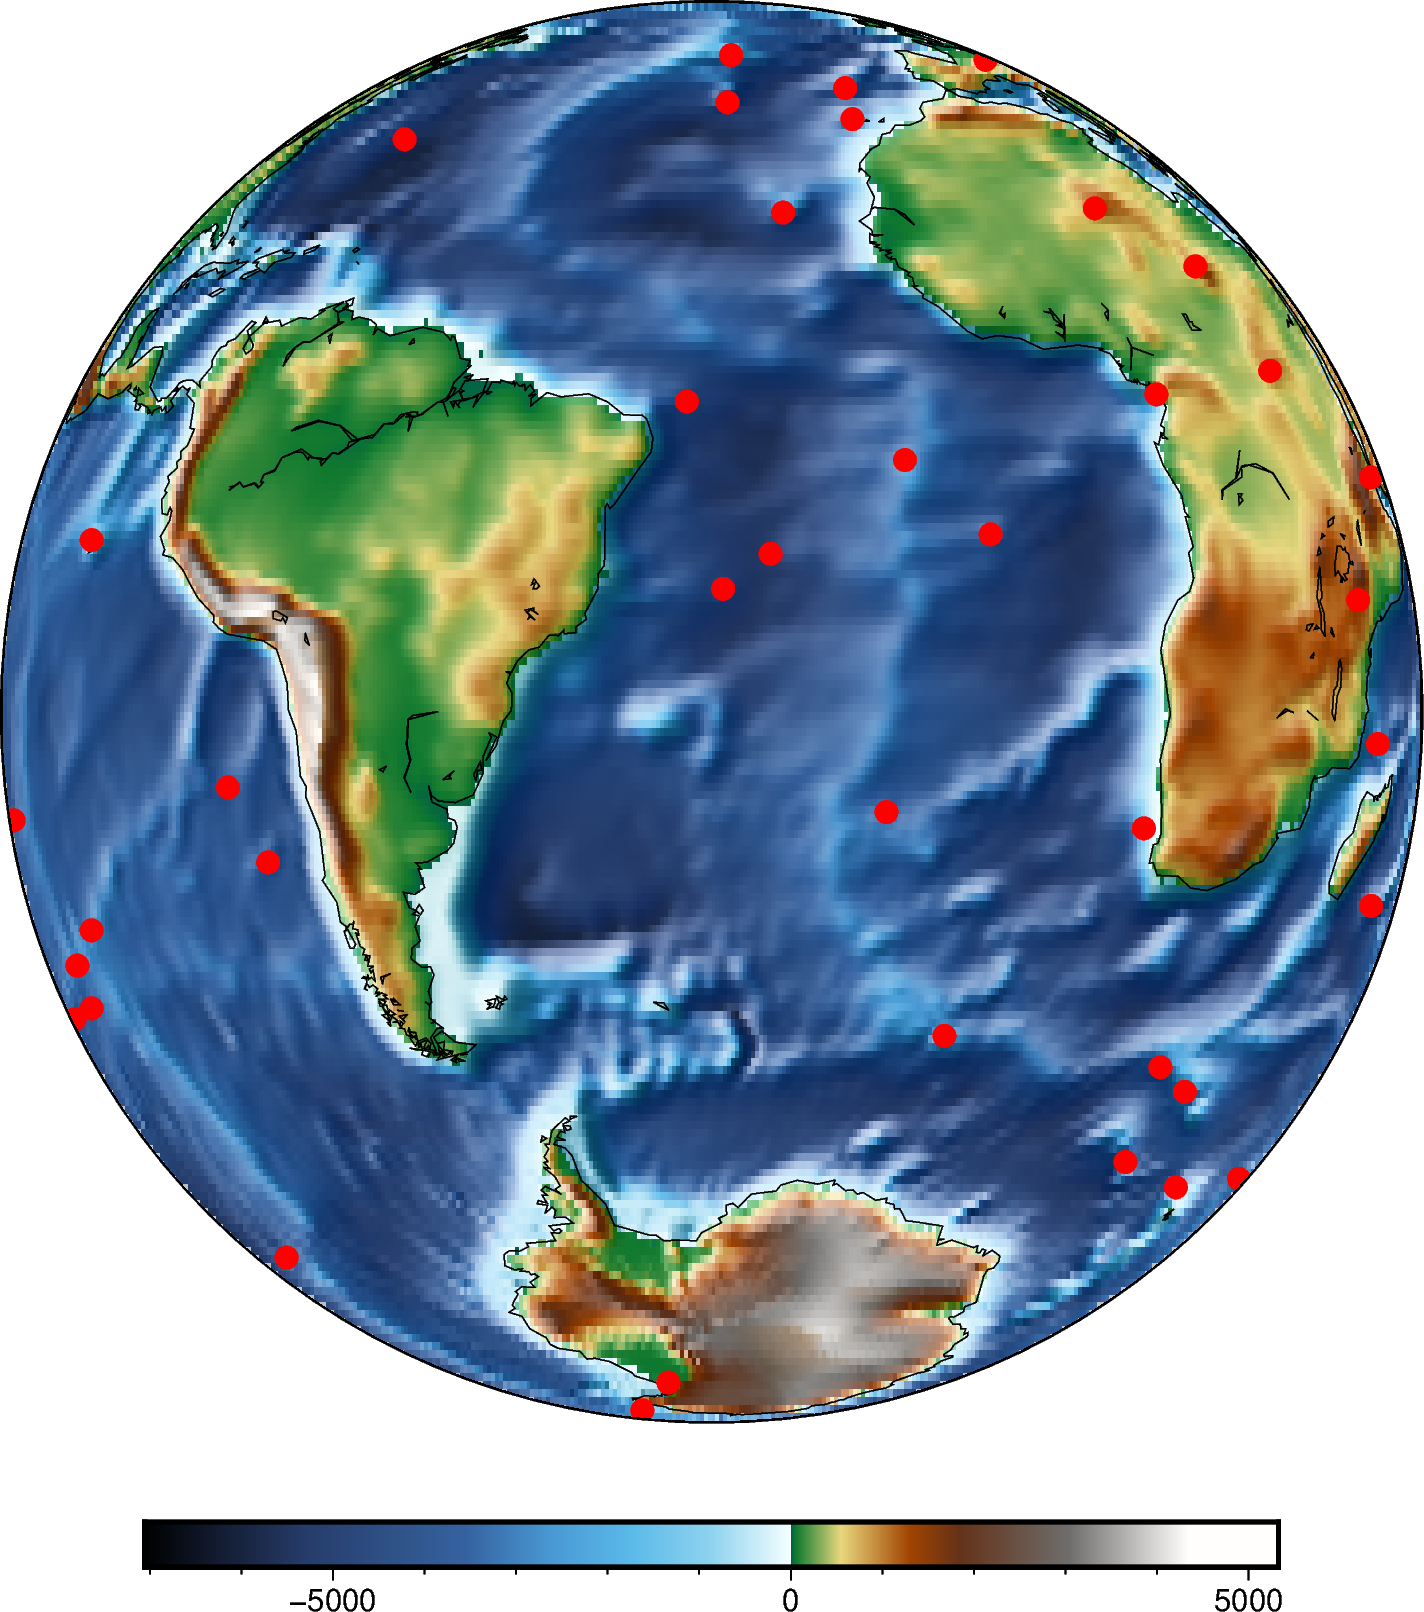

In [7]:
# Just an example
from pygmt.datasets import load_earth_relief #<-- Use global relief for topography

grid = load_earth_relief(resolution='01d', registration='pixel')

fig = pygmt.Figure()
fig.basemap(region='g', projection='G330/-30/12c', frame=True)
fig.grdimage(grid, cmap='geo', shading=True)
fig.coast(resolution='c', shorelines=True, area_thresh=1000)
fig.plot(data='@hotspots.txt', style='c0.2c', fill='red')
fig.colorbar()
fig.show()

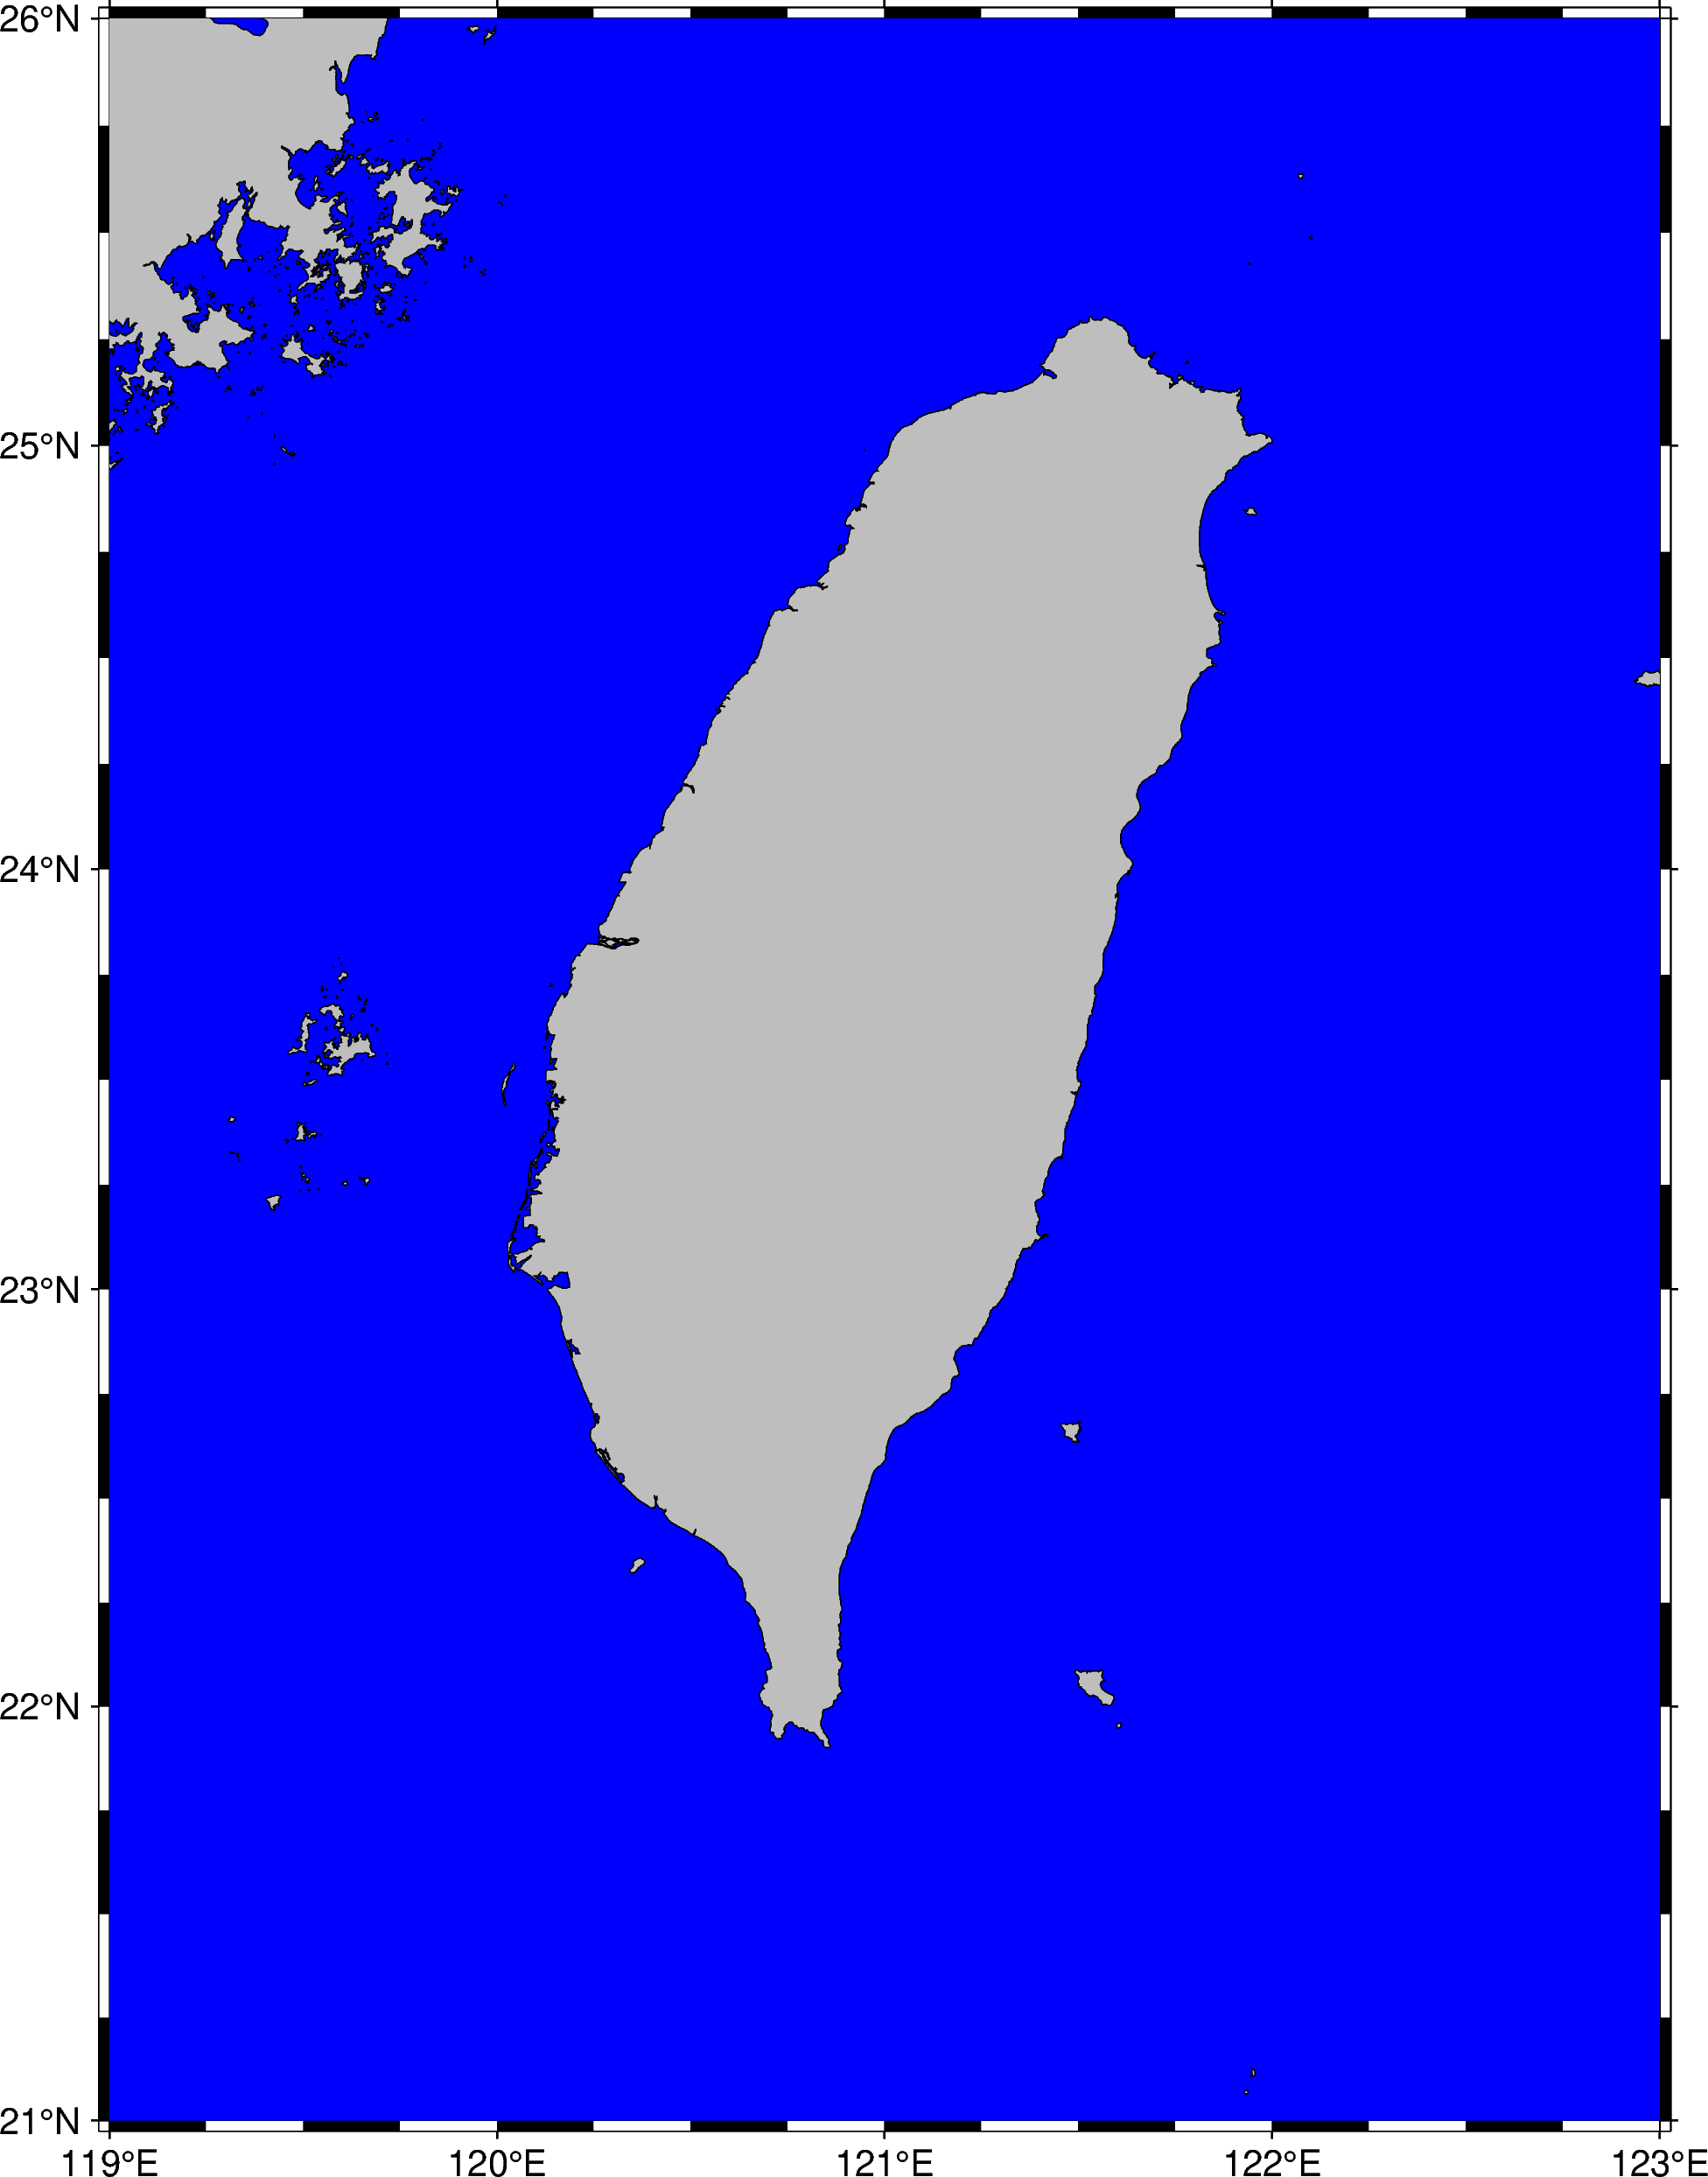

In [8]:
fig = pygmt.Figure()
fig.basemap(region="119/123/21/26", projection="M15c", frame=True)
fig.coast(shorelines=True, land="gray", water="blue", resolution="full")
fig.show()

grdblend [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
grdblend [NOTICE]: SRTM15 Earth Relief v2.7 at 05x05 arc minutes reduced by Gaussian Cartesian filtering (26.2 km fullwidth) [Tozer et al., 2019].
grdblend [NOTICE]:   -> Download 180x180 degree grid tile (earth_relief_05m_p): S90E000


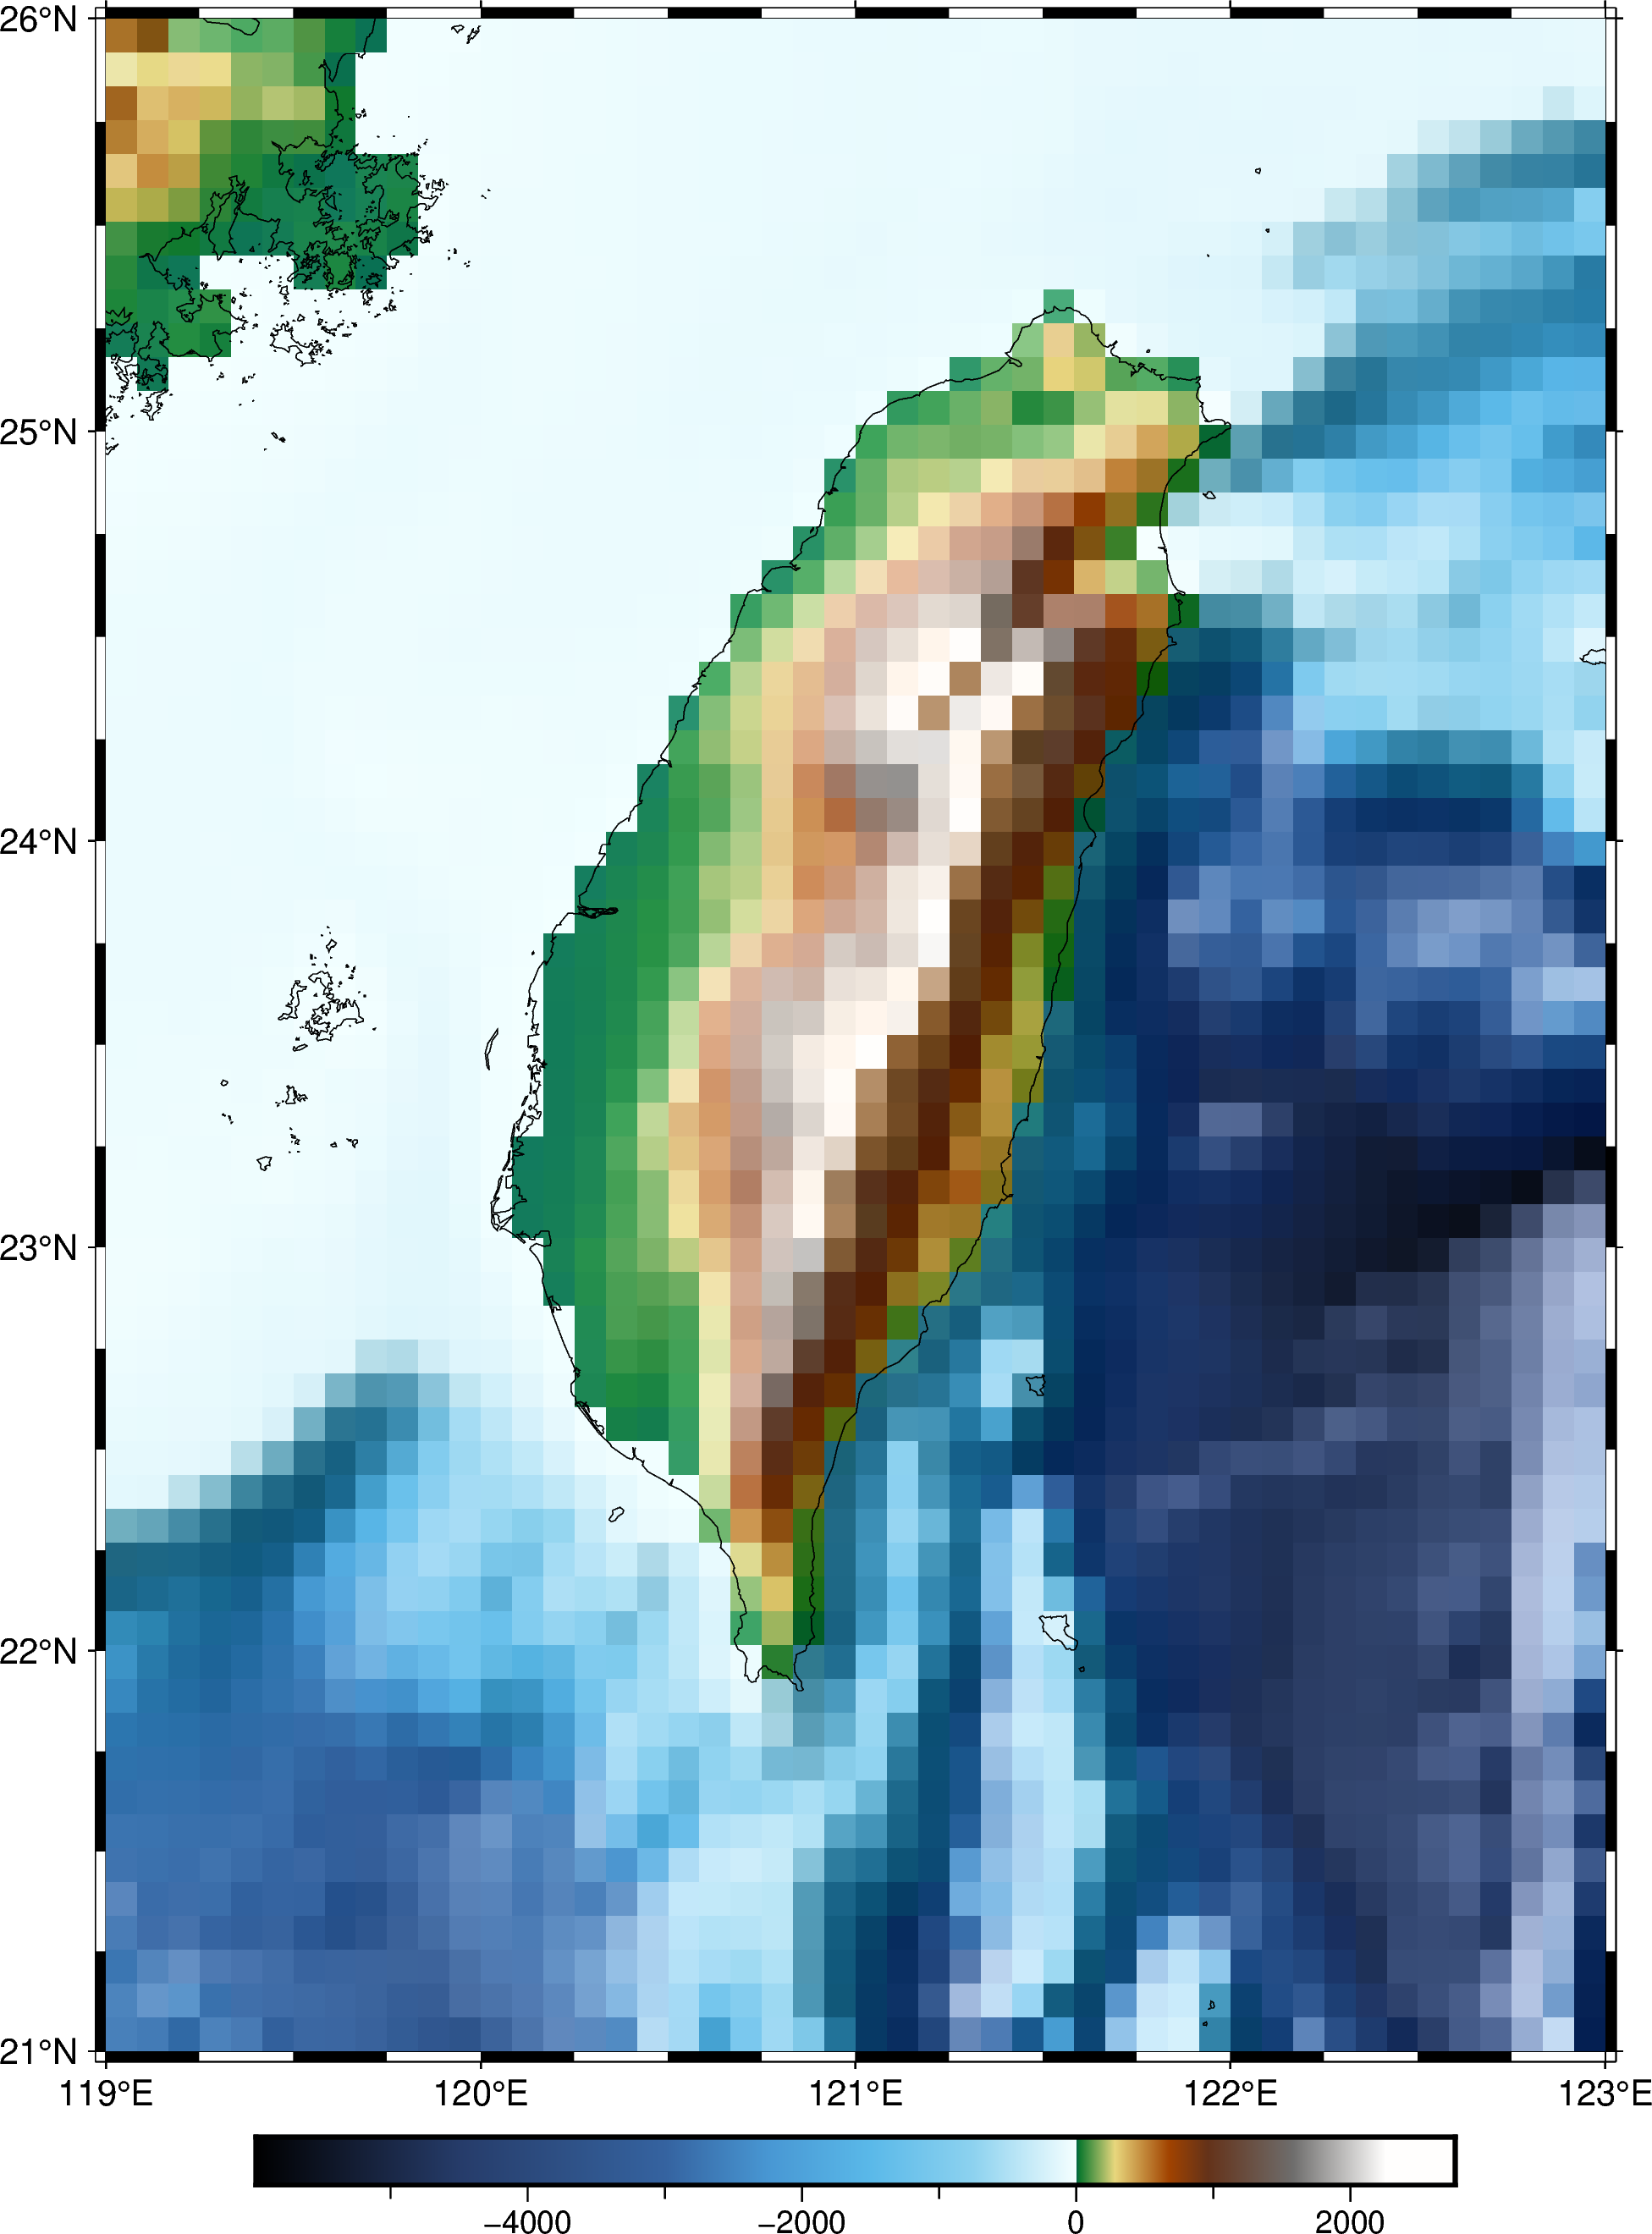

In [9]:
# Plot Taiwan with Earth relief data
from pygmt.datasets import load_earth_relief

# Load earth relief data for the region of Taiwan
# The 'region' parameter in basemap will effectively crop this global grid
grid = load_earth_relief(resolution='05m', region="119/123/21/26", registration='pixel')

fig = pygmt.Figure()
# Set region for Taiwan (longitude: 119-123, latitude: 21-26)
# Use Mercator projection ('M') for a regional view
fig.basemap(region="119/123/21/26", projection="M15c", frame=True)
fig.grdimage(grid, cmap='geo', shading=True)
# Use 'h' (high) resolution for better detail for Taiwan's coastlines
fig.coast(resolution='h', shorelines=True)
# Remove the global hotspots plot, as it's not specific to Taiwan in this context
# fig.plot(data='@hotspots.txt', style='c0.2c', fill='red') # Uncomment if you want to include global hotspots
fig.colorbar()
fig.show()

grdblend [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
grdblend [NOTICE]: SRTM15 Earth Relief v2.7 at 05x05 arc minutes reduced by Gaussian Cartesian filtering (26.2 km fullwidth) [Tozer et al., 2019].
grdblend [NOTICE]:   -> Download 180x180 degree grid tile (earth_relief_05m_p): S90W180


步驟 1/8: 載入太平洋區域地形資料...


plot [WARNING]: Cannot use auto-legend -l for variable symbol color. Option -l ignored.


步驟 2/8: 載入(本地)海脊點資料...
步驟 3/8: 載入並篩選地震資料 (M6.0+)...
步驟 4/8: 繪製地震分佈 (依深度著色)...
步驟 5/8: 載入(本地)全球熱点資料...
步驟 6/8: 建立著名地震資料...
步驟 7/8: 標註著名地震位置...
步驟 8/8: 產生圖例並顯示...


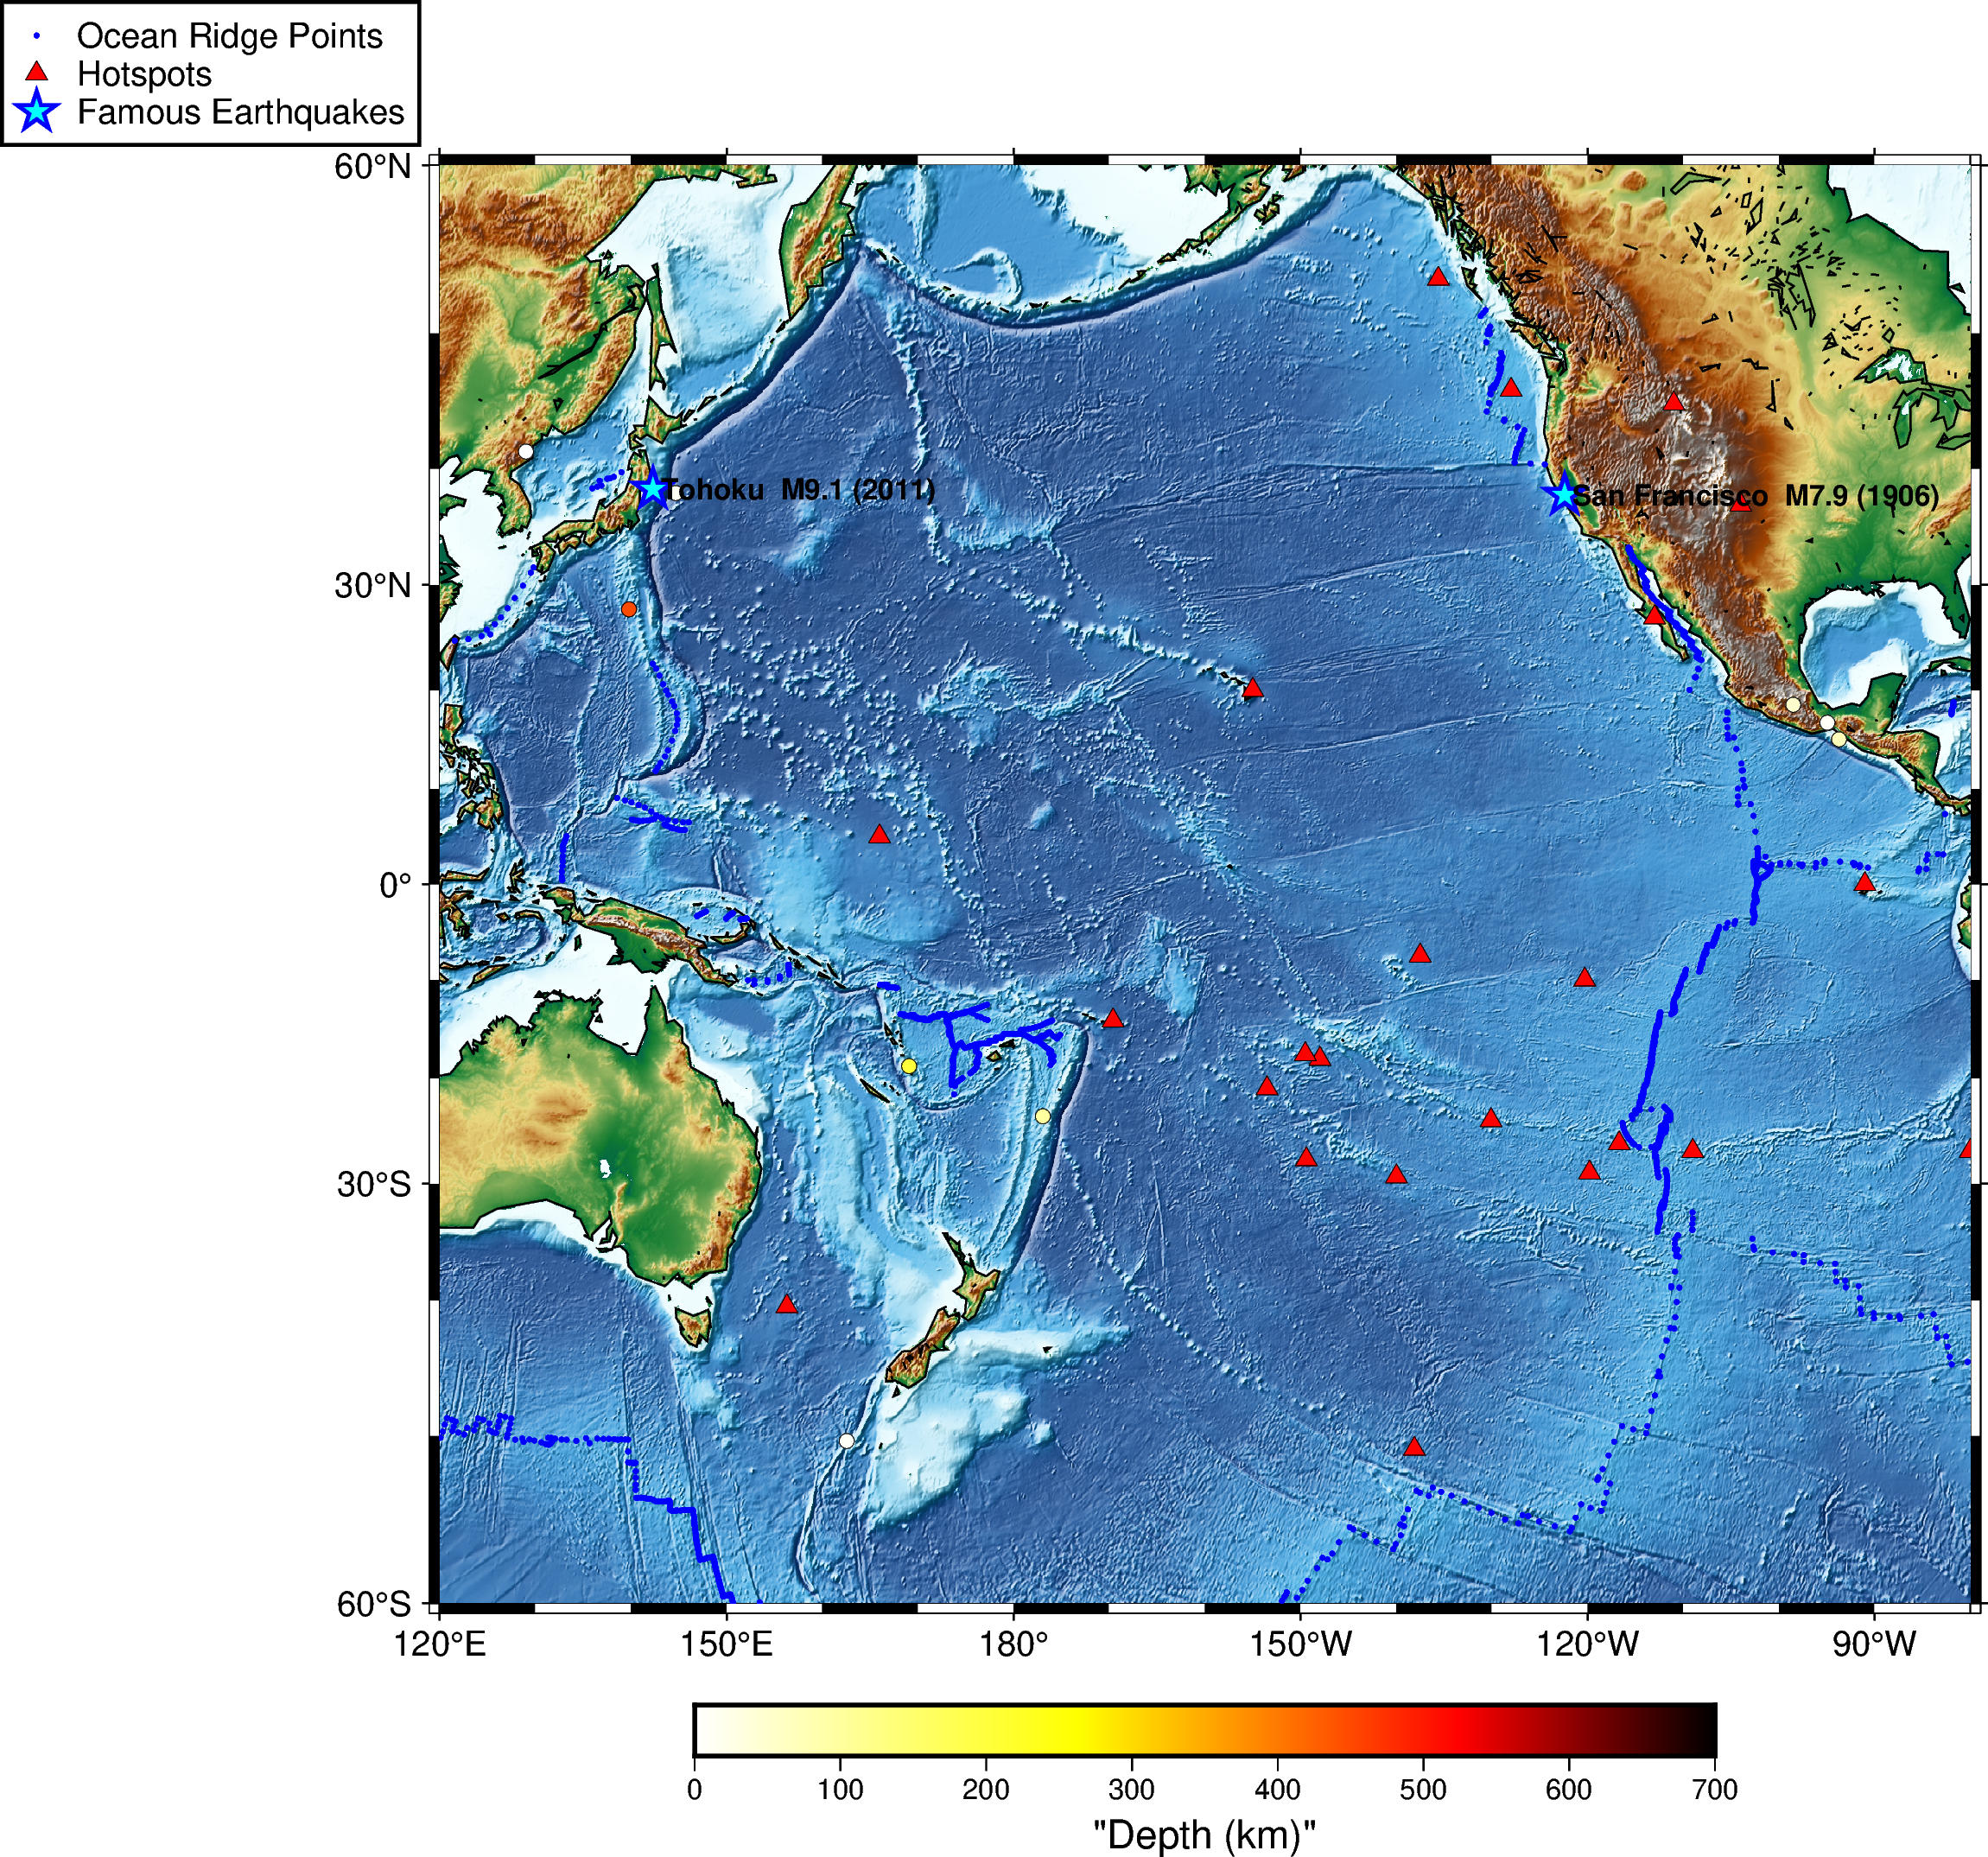

In [11]:
import pygmt
import pandas as pd
# --- 0. 定義新的範圍 (太平洋) ---
# [West, East, South, North]
# 經度 120°E 到 80°W (即 280°), 緯度 60°S 到 60°N
region_pacific = [120, 280, -60, 60]
# --- 1. 初始化地圖 ---
fig = pygmt.Figure()
# --- 2. 繪製底圖與地形 ---
print("步驟 1/8: 載入太平洋區域地形資料...")
# vvv 修改 vvv
grid = pygmt.datasets.load_earth_relief(
resolution='05m',
registration='pixel',
region=region_pacific # <--- 使用新的太平洋範圍
)
# 繪製全球底圖
# vvv 修改 vvv
fig.basemap(
region=region_pacific, # <--- 使用新的太平洋範圍
projection='M15c', # <--- 改用麥卡托投影 (Mercator)
frame=True
)
# ^^^ 修改 ^^^
# 繪製地形暈渲圖 (Shading)
fig.grdimage(
grid=grid,
cmap='geo',
shading=True
)
# 繪製海岸線
fig.coast(shorelines='0.5p,black')
# --- 3. 繪製海脊點 (取代板塊邊界) ---
print("步驟 2/8: 載入(本地)海脊點資料...")
ocean_ridge_points = pygmt.datasets.load_sample_data("ocean_ridge_points")
fig.plot(
x=ocean_ridge_points.longitude,
y=ocean_ridge_points.latitude,
style="c0.05c",
fill="blue",
pen="0.1p,blue",
label="Ocean Ridge Points"
)
# --- 4. 繪製全球地震 (M6.0+) ---
print("步驟 3/8: 載入並篩選地震資料 (M6.0+)...")
data = pygmt.datasets.load_sample_data('usgs_quakes')
data_m6_plus = data[data['mag'] >= 6.0]
print("步驟 4/8: 繪製地震分佈 (依深度著色)...")
pygmt.makecpt(cmap='hot', series=[0, 700], reverse=True)
# 舊版 PyGMT 語法
fig.plot(
x=data_m6_plus.longitude,
y=data_m6_plus.latitude,
style='c0.15c',
fill=data_m6_plus.depth,
cmap=True,
pen='0.1p,black',
label="Earthquakes (M6.0+)"
)
fig.colorbar(frame='a100+l"Depth (km)"', position="JBC+w10c/0.5c+h+o0/1c")
# --- 5. 繪製全球熱點 (取代火山) ---
print("步驟 5/8: 載入(本地)全球熱点資料...")
hotspots = pygmt.datasets.load_sample_data("hotspots")
fig.plot(
x=hotspots.longitude,
y=hotspots.latitude,
style='t0.25c',
fill='red',
pen='0.1p,black',
label="Hotspots"
)
# --- 6. 標註歷史上著名地震 ---
print("步驟 6/8: 建立著名地震資料...")
# vvv 修改 vvv
# 為了匹配 [120, 280] 的經度範圍，我們將負經度轉換為 360+lon
# (Sumatra 95.8°E 已在此範圍之外，PyGMT 會自動將其裁切掉)
famous_quakes_gmt = {
'lon': [287.0, 212.7, 95.8, 142.3, 237.6], # 轉換 -lon 為 360+lon
'lat': [-38.2, 61.0, 3.3, 38.3, 37.8],
'mag': [9.5, 9.2, 9.1, 9.1, 7.9],
'year': [1960, 1964, 2004, 2011, 1906],
'name': ['Chile', 'Alaska', 'Sumatra', 'Tohoku', 'San Francisco']
}
df_famous = pd.DataFrame(famous_quakes_gmt)
# ^^^ 修改 ^^^
print("步驟 7/8: 標註著名地震位置...")
fig.plot(
x=df_famous.lon,
y=df_famous.lat,
style='a0.4c',
fill='cyan',
pen='1p,blue',
label="Famous Earthquakes"
)
labels = [
f" {name}\n M{mag} ({year})"
for name, mag, year in zip(df_famous.name, df_famous.mag, df_famous.year)
]
fig.text(
x=df_famous.lon,
y=df_famous.lat,
text=labels,
justify='LM',
font='8p,Helvetica-Bold,black'
)
# --- 7. 加上圖例 ---
print("步驟 8/8: 產生圖例並顯示...")
fig.legend(position='JTL+o0.2c', box='+gwhite+p1p') # JTL = Justify Top Left
# --- 8. 顯示與儲存圖片 ---
fig.show()
# 儲存圖片
# fig.savefig("pacific_tectonics_map_zoomed.png")